In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

%matplotlib inline

headway = pd.read_csv('../data/Headway Data.csv')

In [7]:
headway.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,15.983333,1.983333,0,0,1,0,0.0,0,2,12.650000
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,17.333333,3.333333,0,0,1,0,0.0,0,11,0.000000
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,23,22.416666
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,24,5.766666
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,25,0.000000


In [8]:
headway_r55 = headway[['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 'HDWY_DEV', 'ADHERENCE', 'DWELL_IN_MINS']][(headway['ROUTE_ABBR']== 55)]
headway_r55.head()

,DATE,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,TRIP_EDGE,HDWY_DEV,ADHERENCE,DWELL_IN_MINS
3320,2021-11-01,55,300293,TO DOWNTOWN,1,NaN,-0.800000,8.6
3321,2021-11-01,55,300293,TO DOWNTOWN,0,NaN,-0.683333,0.0
3322,2021-11-01,55,300293,TO DOWNTOWN,0,NaN,-0.550000,0.0
3323,2021-11-01,55,300293,TO DOWNTOWN,0,NaN,0.100000,0.0
3324,2021-11-01,55,300293,TO DOWNTOWN,0,NaN,-1.166666,0.0


In [9]:
trip_id_r55= headway_r55.groupby(['TRIP_ID', 'ROUTE_DIRECTION_NAME', 'ROUTE_ABBR'], as_index=False)['ADHERENCE', 'DWELL_IN_MINS', 'HDWY_DEV'].mean()
trip_id_r55

C:\Users\sarah\AppData\Local\Temp\ipykernel_4652\985559691.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  trip_id_r55= headway_r55.groupby(['TRIP_ID', 'ROUTE_DIRECTION_NAME', 'ROUTE_ABBR'], as_index=False)['ADHERENCE', 'DWELL_IN_MINS', 'HDWY_DEV'].mean()


,TRIP_ID,ROUTE_DIRECTION_NAME,ROUTE_ABBR,ADHERENCE,DWELL_IN_MINS,HDWY_DEV
0,300286,FROM DOWNTOWN,55,-0.318803,1.932906,NaN
1,300287,FROM DOWNTOWN,55,-1.232051,2.043803,-1.042821
2,300288,FROM DOWNTOWN,55,-0.925757,2.116017,-1.075261
3,300289,FROM DOWNTOWN,55,-0.577991,2.278419,-0.808462
4,300290,FROM DOWNTOWN,55,-1.592949,2.126496,-2.034359
...,...,...,...,...,...,...
2856,328689,TO DOWNTOWN,55,-3.971666,1.175000,2.205833
2857,328690,TO DOWNTOWN,55,-1.658333,2.191667,0.827500
2858,328691,TO DOWNTOWN,55,-2.373333,1.903333,-0.241667
2859,329206,TO DOWNTOWN,55,-0.356481,7.550926,0.483333


In [10]:
headway_r55

,DATE,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,TRIP_EDGE,HDWY_DEV,ADHERENCE,DWELL_IN_MINS
3320,2021-11-01,55,300293,TO DOWNTOWN,1,NaN,-0.800000,8.600000
3321,2021-11-01,55,300293,TO DOWNTOWN,0,NaN,-0.683333,0.000000
3322,2021-11-01,55,300293,TO DOWNTOWN,0,NaN,-0.550000,0.000000
3323,2021-11-01,55,300293,TO DOWNTOWN,0,NaN,0.100000,0.000000
3324,2021-11-01,55,300293,TO DOWNTOWN,0,NaN,-1.166666,0.000000
...,...,...,...,...,...,...,...,...
1980230,2022-11-01,55,328691,TO DOWNTOWN,2,NaN,-5.366666,5.316666
1981375,2022-11-01,55,329206,TO DOWNTOWN,1,NaN,0.450000,5.583333
1981376,2022-11-01,55,329206,TO DOWNTOWN,2,NaN,1.016666,2.200000
1981707,2022-11-01,55,329899,TO DOWNTOWN,1,NaN,0.800000,31.933333


In [11]:
headway_r55_nov = headway[['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 'HDWY_DEV', 'ADHERENCE', 'DWELL_IN_MINS']][(headway['ROUTE_ABBR']== 55)]
headway_r55_nov = headway_r55_nov[(headway['DATE']=='2022-11-01')]
headway_r55_nov

C:\Users\sarah\AppData\Local\Temp\ipykernel_4652\1656088711.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  headway_r55_nov = headway_r55_nov[(headway['DATE']=='2022-11-01')]


,DATE,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,TRIP_EDGE,HDWY_DEV,ADHERENCE,DWELL_IN_MINS
1979065,2022-11-01,55,328279,TO DOWNTOWN,1,NaN,-1.016666,4.850000
1979066,2022-11-01,55,328279,TO DOWNTOWN,0,NaN,-0.166666,1.883333
1979067,2022-11-01,55,328279,TO DOWNTOWN,0,NaN,-2.083333,0.000000
1979068,2022-11-01,55,328279,TO DOWNTOWN,0,NaN,-0.666666,0.000000
1979069,2022-11-01,55,328279,TO DOWNTOWN,0,NaN,-1.116666,0.000000
...,...,...,...,...,...,...,...,...
1980230,2022-11-01,55,328691,TO DOWNTOWN,2,NaN,-5.366666,5.316666
1981375,2022-11-01,55,329206,TO DOWNTOWN,1,NaN,0.450000,5.583333
1981376,2022-11-01,55,329206,TO DOWNTOWN,2,NaN,1.016666,2.200000
1981707,2022-11-01,55,329899,TO DOWNTOWN,1,NaN,0.800000,31.933333


In [12]:
headway_r55_nov1 = headway_r55_nov.groupby(['TRIP_ID'], as_index=False)['ADHERENCE', 'DWELL_IN_MINS'].mean()
headway_r55_nov1

C:\Users\sarah\AppData\Local\Temp\ipykernel_4652\454086795.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  headway_r55_nov1 = headway_r55_nov.groupby(['TRIP_ID'], as_index=False)['ADHERENCE', 'DWELL_IN_MINS'].mean()


,TRIP_ID,ADHERENCE,DWELL_IN_MINS
0,328272,0.066667,1.605556
1,328273,-1.461111,2.633333
2,328274,-0.086111,2.180556
3,328275,-2.083333,2.738889
4,328276,-1.463889,1.566667
...,...,...,...
190,328689,-8.472222,0.000000
191,328690,-1.644444,2.188889
192,328691,-2.444444,3.216666
193,329206,0.733333,3.891666


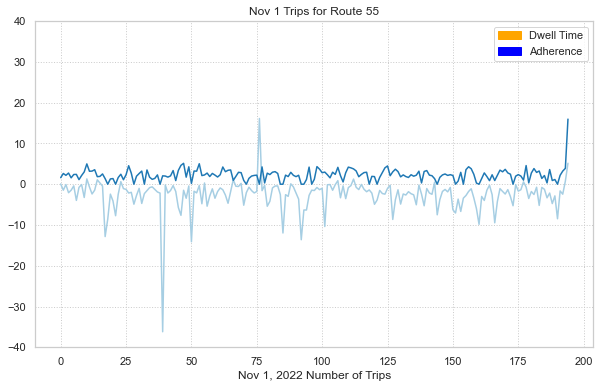

In [13]:
rcParams['figure.figsize'] = 10,6

plt.plot(headway_r55_nov1.ADHERENCE)
plt.plot(headway_r55_nov1.DWELL_IN_MINS)
plt.title("Nov 1 Trips for Route 55")
plt.xlabel("Nov 1, 2022 Number of Trips")
plt.ylim(-40,40)
plt.grid(True, linestyle =':')

orange_patch = mpatches.Patch(color='orange', label='Dwell Time')
blue_patch =mpatches.Patch(color='blue', label= 'Adherence')
plt.legend(handles=[orange_patch, blue_patch])

plt.show()

In [14]:
headway_r55_nov1_sum = headway_r55_nov.groupby(['TRIP_ID', 'ROUTE_DIRECTION_NAME'], as_index=False)['ADHERENCE', 'DWELL_IN_MINS'].sum()
headway_r55_nov1_sum

C:\Users\sarah\AppData\Local\Temp\ipykernel_4652\3023072979.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  headway_r55_nov1_sum = headway_r55_nov.groupby(['TRIP_ID', 'ROUTE_DIRECTION_NAME'], as_index=False)['ADHERENCE', 'DWELL_IN_MINS'].sum()


,TRIP_ID,ROUTE_DIRECTION_NAME,ADHERENCE,DWELL_IN_MINS
0,328272,FROM DOWNTOWN,0.400000,9.633333
1,328273,FROM DOWNTOWN,-8.766667,15.800000
2,328274,FROM DOWNTOWN,-0.516668,13.083333
3,328275,FROM DOWNTOWN,-12.499997,16.433333
4,328276,FROM DOWNTOWN,-8.783332,9.399999
...,...,...,...,...
190,328689,TO DOWNTOWN,-25.416666,0.000000
191,328690,TO DOWNTOWN,-4.933333,6.566666
192,328691,TO DOWNTOWN,-7.333332,9.649999
193,329206,TO DOWNTOWN,1.466666,7.783333


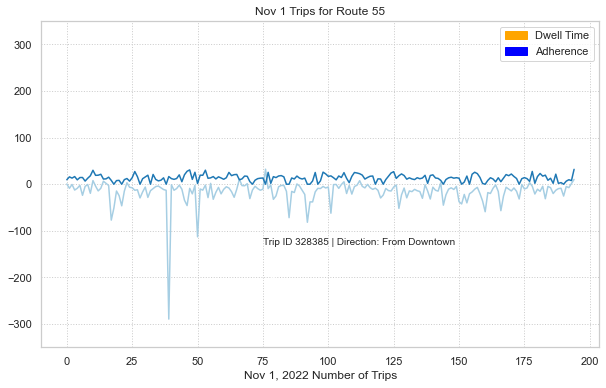

In [15]:
rcParams['figure.figsize'] = 10,6

plt.plot(headway_r55_nov1_sum.ADHERENCE)
plt.plot(headway_r55_nov1_sum.DWELL_IN_MINS)
plt.title("Nov 1 Trips for Route 55")
plt.xlabel("Nov 1, 2022 Number of Trips")
plt.ylim(-350,350)
plt.grid(True, linestyle =':')

#attempting to construct a cmap to use colors of seaborn with matplotlib

orange_patch = mpatches.Patch(color='orange', label='Dwell Time')
blue_patch =mpatches.Patch(color='blue', label= 'Adherence')
plt.legend(handles=[orange_patch, blue_patch])


#attempting to annotate this bad boy
#input annotation
# plt.annotate(
# # Label and coordinate
# 'Trip ID 328385 | Direction: From Downtown', xy=(40, -290), xytext=(75, -125),
#Arrow Pointer
plt.annotate('Trip ID 328385 | Direction: From Downtown', xy=(40, -290), xytext=(75, -125),
            arrowprops={'arrowstyle': '->'}, va='center')
# arrowprops=dict(facecolor='black'))


plt.show()

In [16]:
headway_r55_nov1_sum1 = headway_r55_nov[['ADHERENCE', 'DWELL_IN_MINS']].sum()
headway_r55_nov1_sum1

ADHERENCE       -3143.549736
DWELL_IN_MINS    2570.583253
dtype: float64

In [17]:
headway_r55_nov1_dir = headway_r55_nov.groupby(['ROUTE_DIRECTION_NAME'], as_index=False)['ADHERENCE', 'DWELL_IN_MINS'].sum()
headway_r55_nov1_dir

C:\Users\sarah\AppData\Local\Temp\ipykernel_4652\2899120821.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  headway_r55_nov1_dir = headway_r55_nov.groupby(['ROUTE_DIRECTION_NAME'], as_index=False)['ADHERENCE', 'DWELL_IN_MINS'].sum()


,ROUTE_DIRECTION_NAME,ADHERENCE,DWELL_IN_MINS
0,FROM DOWNTOWN,-1652.349877,1021.799964
1,TO DOWNTOWN,-1491.199859,1548.783289


In [13]:
len(headway_r55_nov1['TRIP_ID'].unique())

195

In [82]:
headway_adherence = headway_r55_nov1_sum.loc[(headway_r55_nov1_sum['ADHERENCE']<-200)]
headway_adherence

,TRIP_ID,ROUTE_DIRECTION_NAME,ADHERENCE,DWELL_IN_MINS
39,328385,FROM DOWNTOWN,-289.483329,16.45


In [44]:
headway_r55_adj = headway[['TRIP_ID','SCHEDULED_TIME']][(headway['TRIP_ID']== 328385)]
headway_r55_adj

,TRIP_ID,SCHEDULED_TIME
1905523,328385,09:55:00
1905524,328385,10:05:00
1905525,328385,10:17:00
1905526,328385,10:23:00
1905527,328385,10:30:00
...,...,...
1979390,328385,10:05:00
1979391,328385,10:17:00
1979392,328385,10:23:00
1979393,328385,10:30:00


In [49]:
pd.merge(headway_adherence,
        headway_r55_adj,
        on='TRIP_ID',
        how ="inner")

,TRIP_ID,ROUTE_DIRECTION_NAME,ADHERENCE,DWELL_IN_MINS,SCHEDULED_TIME
0,328385,FROM DOWNTOWN,-289.483329,16.45,09:55:00
1,328385,FROM DOWNTOWN,-289.483329,16.45,10:05:00
2,328385,FROM DOWNTOWN,-289.483329,16.45,10:17:00
3,328385,FROM DOWNTOWN,-289.483329,16.45,10:23:00
4,328385,FROM DOWNTOWN,-289.483329,16.45,10:30:00
...,...,...,...,...,...
61,328385,FROM DOWNTOWN,-289.483329,16.45,10:05:00
62,328385,FROM DOWNTOWN,-289.483329,16.45,10:17:00
63,328385,FROM DOWNTOWN,-289.483329,16.45,10:23:00
64,328385,FROM DOWNTOWN,-289.483329,16.45,10:30:00


In [38]:
headway_r55_nov1_sum_0=headway_r55_nov1_sum[['ADHERENCE', 'DWELL_IN_MINS']]

In [44]:
sns.set_theme(style='white', palette=('Paired'), font='sans-serif', font_scale=1, color_codes=True, rc=None)

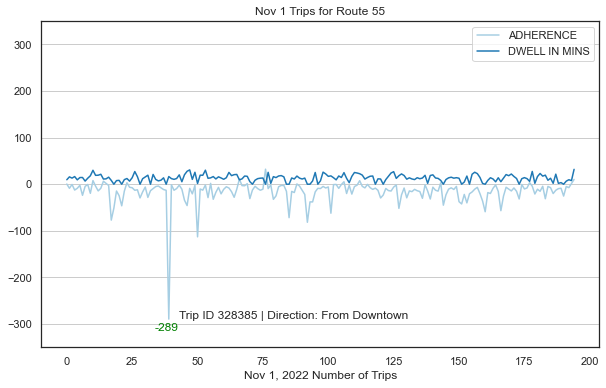

In [114]:
ax = sns.lineplot(data=headway_r55_nov1_sum_0, dashes=False)
sns.set_style("white")
plt.grid(visible = True, axis = 'y')
plt.title('Nov 1 Trips for Route 55')
plt.xlabel("Nov 1, 2022 Number of Trips")
plt.ylim(-350,350)
plt.legend(labels=["ADHERENCE","DWELL IN MINS"])
# plt.grid(True, linestyle =':')

#annotation 
ax.text(43, -289, "Trip ID 328385 | Direction: From Downtown")


#labeling a point on a graph

for x, y in zip(headway_r55_nov1_sum_0['DWELL_IN_MINS'], headway_r55_nov1_sum_0['ADHERENCE']):
    if y < -200:
        plt.text(x=x+17,
                 y=y-25, 
                 s='{:.0f}'.format(y), 
                 color='green')

plt.show()